In [5]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import random

# Jupiter Notebooks Magic Function to display plot.pyplot images
%matplotlib notebook

# Function used to veiw the weather reporting sub stations in Ann Arbor Michigan
def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    
    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')




<IPython.core.display.Javascript object>


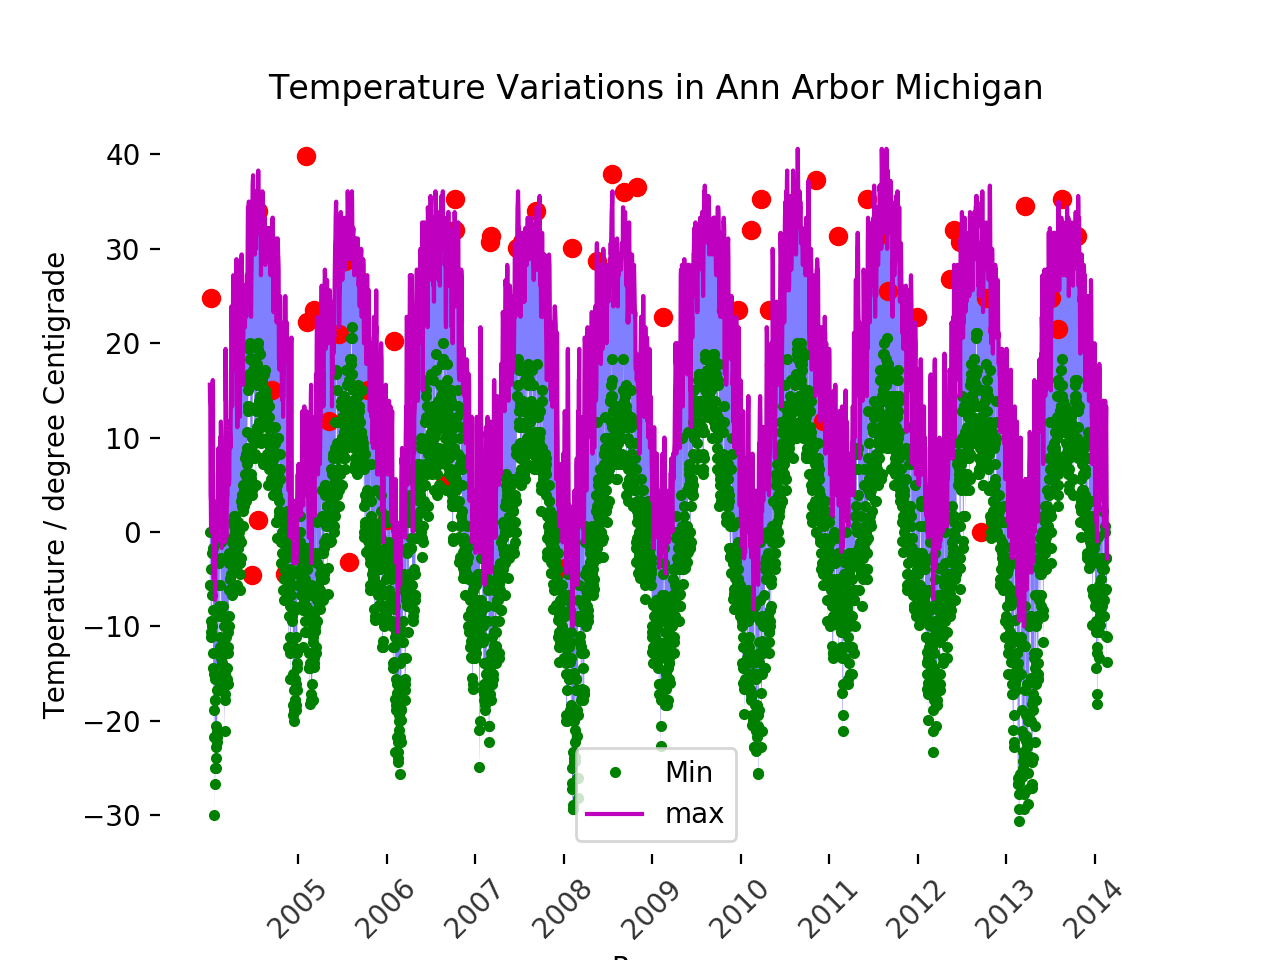

In [6]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import random

# Jupiter Notebooks Magic Function to display plot.pyplot images
%matplotlib notebook

# reading and parsing weather data from 2005 to 2015 minus leap year days (29th Feb)
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# list1 var contains index values of the days to be removed
# ind_vals variable contain dates of Feb 29th (to be removed) 
list1,ind_vals=[],[]

# To get the dates ending with '29
for ite in df['Date']:
    if ite[-2:] == '29' and ite[-5:-3] == '02':
        list1.append(ite)
        
# getting the index values of all such dates        
for ite in list1:
    ind_vals.append(df[df['Date']==ite].index.values)

#dropping leap year dates from the data frame
df1=df.drop(ind_vals[0],axis=0)#.groupby(by='Date',axis=1).max()

#fetching all data befor year 2015 and grouping by date to find the min and max
df_min=df1.where(df1['Date']<'2015-01-01').groupby('Date').min() 

# fetching both the actual and index values 
min_list=list(df_min.iloc[:,-1].values)
min_list_y=df_min.iloc[:,-1].index.tolist()

# dividing the temperature data by 10 to normalize 
min_list=[ite/10 for ite in min_list]

# doing all of the above for max temperatures also
df_max=df1.where(df1['Date']<'2015-01-01').groupby('Date').max() 

max_list=list(df_max.iloc[:,-1].values)
max_list=[ite1/10 for ite1 in max_list]


## Scatter Points to dates in 2015 and droping np.NaN values in the df

df_scatter=df1.where(df1['Date']>'2015-01-01').dropna().groupby('Date').max()

scatter_list= list(df_scatter.iloc[:,-1].values)

scatter_list=[ite3/8.5 for ite3 in scatter_list]
scatter_list=random.sample(scatter_list,60)

scat_list=[random.randint(1,3600) for i in range(len(scatter_list))]

# Plotting the data using line plots for Data before 2015 and scatter for 2015

plt.figure()

plt.plot(min_list, '.',c='g')
plt.plot( max_list, '-',c='m')

# some labeling and cleaning
plt.xlabel('Range')
plt.ylabel('Temperature / degree Centigrade')
plt.title('Temperature Variations in Ann Arbor Michigan')

# Marking the xticks of the graph in terms of yearly breakdown
counter=[]
x12=360
for ite in range(11):
    counter.append(x12)
    x12=x12+360
    

# setting xticks
plt.xticks(counter, ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'], alpha=0.8)

# add a legend with legend entries (because we didn't have labels when we plotted the data series)

# creating a legend to indicate max and min plots
plt.legend(['Min', 'max','2015'],loc=0, frameon=True ,prop={'size':10})

# shading the area between 2 plots 

plt.gca().fill_between(range(len(min_list)), 
                       min_list, max_list, 
                       facecolor='blue', 
                       alpha=0.5)

# scatter plot for temps in year 2015
plt.scatter(scat_list,scatter_list, c='r')

plt.tick_params(top='off', bottom='on', left='on', right='off', labelleft='on', labelbottom='on')

# removing spine(outer boundry of the chart)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
# rotate the tick labels for the x axis    
x = plt.gca().xaxis

for item in x.get_ticklabels():
    item.set_rotation(45)
    
    